In [22]:
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin-1')
df.head()

/tmp/ipykernel_107/2798381327.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [50]:
selected_columns = ['nkill', 'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'country_txt', 'nperps']
df = df[selected_columns]

In [51]:
nperps_specyfic = df[(df['nperps'] > 500)]
nperps_specyfic

,nkill,attacktype1_txt,weaptype1_txt,targtype1_txt,country_txt,nperps
9745,NaN,Armed Assault,Firearms,Business,El Salvador,1000.0
13702,14.0,Armed Assault,Firearms,Military,El Salvador,600.0
17374,NaN,Hostage Taking (Barricade Incident),Explosives,Police,El Salvador,600.0
17571,23.0,Armed Assault,Firearms,Private Citizens & Property,El Salvador,600.0
17625,NaN,Facility/Infrastructure Attack,Unknown,Private Citizens & Property,El Salvador,1000.0
...,...,...,...,...,...,...
163789,59.0,Armed Assault,Firearms,Private Citizens & Property,Nigeria,3000.0
165421,NaN,Bombing/Explosion,Explosives,Private Citizens & Property,Syria,5000.0
170257,0.0,Armed Assault,Firearms,Religious Figures/Institutions,Pakistan,1000.0
174689,108.0,Hostage Taking (Barricade Incident),Explosives,Government (Diplomatic),Central African Republic,700.0


In [52]:
df = df[(df['nperps'] > 0) & (df['nperps'] < 500) & (df['attacktype1_txt'] != 'Unknown') & (df['targtype1_txt'] == 'Private Citizens & Property') & (df['weaptype1_txt'] != 'Unknown')]

In [53]:
df.dropna()

,nkill,attacktype1_txt,weaptype1_txt,targtype1_txt,country_txt,nperps
83,0.0,Bombing/Explosion,Explosives,Private Citizens & Property,United States,4.0
196,0.0,Facility/Infrastructure Attack,Incendiary,Private Citizens & Property,United States,4.0
363,0.0,Bombing/Explosion,Explosives,Private Citizens & Property,United States,1.0
395,0.0,Assassination,Firearms,Private Citizens & Property,United States,3.0
443,0.0,Armed Assault,Firearms,Private Citizens & Property,Argentina,22.0
...,...,...,...,...,...,...
181541,0.0,Armed Assault,Incendiary,Private Citizens & Property,Germany,1.0
181568,1.0,Assassination,Firearms,Private Citizens & Property,Afghanistan,3.0
181605,4.0,Bombing/Explosion,Explosives,Private Citizens & Property,Nigeria,1.0
181612,0.0,Hostage Taking (Kidnapping),Firearms,Private Citizens & Property,India,3.0


In [54]:
df.nunique()


nkill               96
attacktype1_txt      8
weaptype1_txt        9
targtype1_txt        1
country_txt        125
nperps              57
dtype: int64

In [55]:
df['nperps'].value_counts()

nperps
1.0      1523
2.0      1030
3.0       411
4.0       341
5.0       176
20.0      157
6.0       149
50.0      140
100.0     137
30.0      129
10.0      107
200.0     106
15.0       88
8.0        69
40.0       66
7.0        64
12.0       54
25.0       48
300.0      43
60.0       42
150.0      35
9.0        23
80.0       21
70.0       20
400.0      14
24.0       14
13.0       12
11.0       11
120.0      10
21.0        9
16.0        8
14.0        8
250.0       6
26.0        6
101.0       6
45.0        6
17.0        5
22.0        4
35.0        4
140.0       3
130.0       3
75.0        2
18.0        2
180.0       2
33.0        2
19.0        2
32.0        2
34.0        1
90.0        1
84.0        1
87.0        1
27.0        1
51.0        1
350.0       1
41.0        1
450.0       1
99.0        1
Name: count, dtype: int64

In [56]:
df['attacktype1_txt'].value_counts()

attacktype1_txt
Armed Assault                          2188
Bombing/Explosion                      1487
Assassination                           634
Hostage Taking (Kidnapping)             459
Facility/Infrastructure Attack          196
Unarmed Assault                          98
Hostage Taking (Barricade Incident)      46
Hijacking                                22
Name: count, dtype: int64

In [57]:
df['targtype1_txt'].value_counts()

targtype1_txt
Private Citizens & Property    5130
Name: count, dtype: int64

In [58]:
df['weaptype1_txt'].value_counts()

weaptype1_txt
Firearms                                                                       2865
Explosives                                                                     1540
Melee                                                                           457
Incendiary                                                                      223
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      25
Chemical                                                                         14
Other                                                                             3
Sabotage Equipment                                                                2
Biological                                                                        1
Name: count, dtype: int64

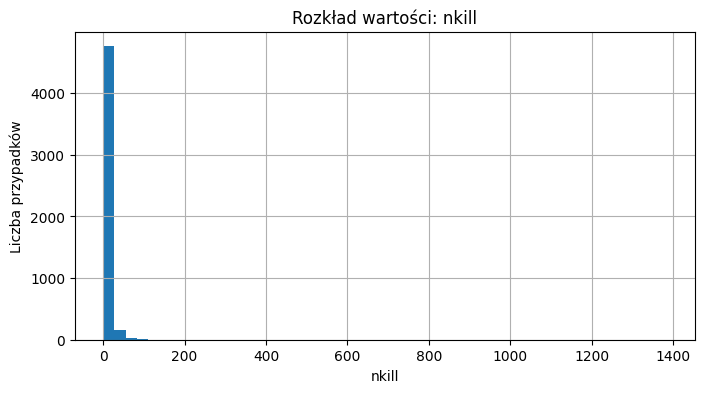

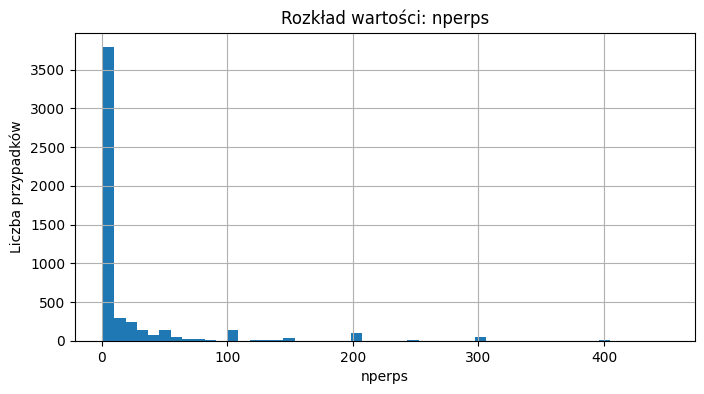

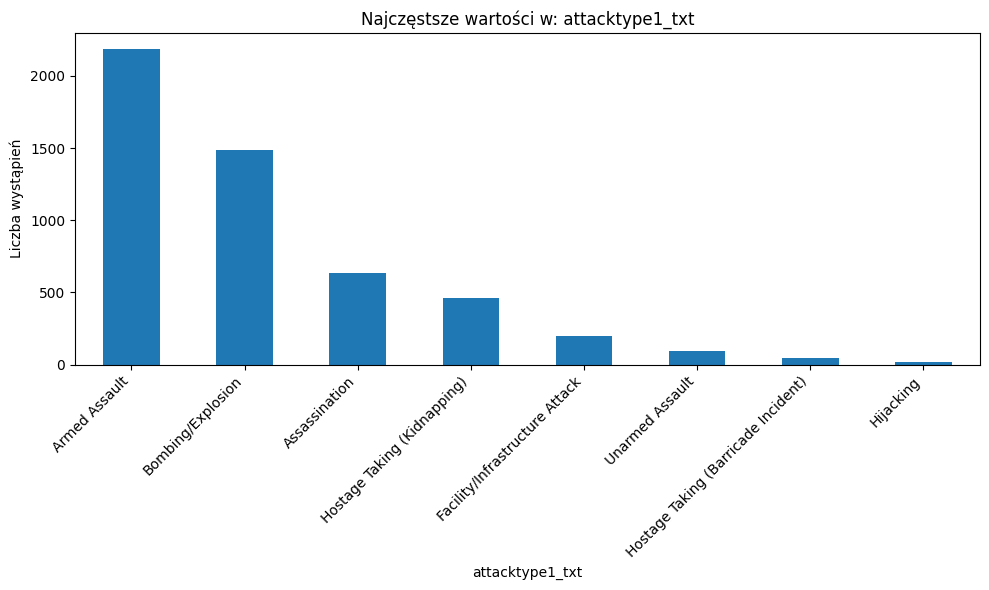

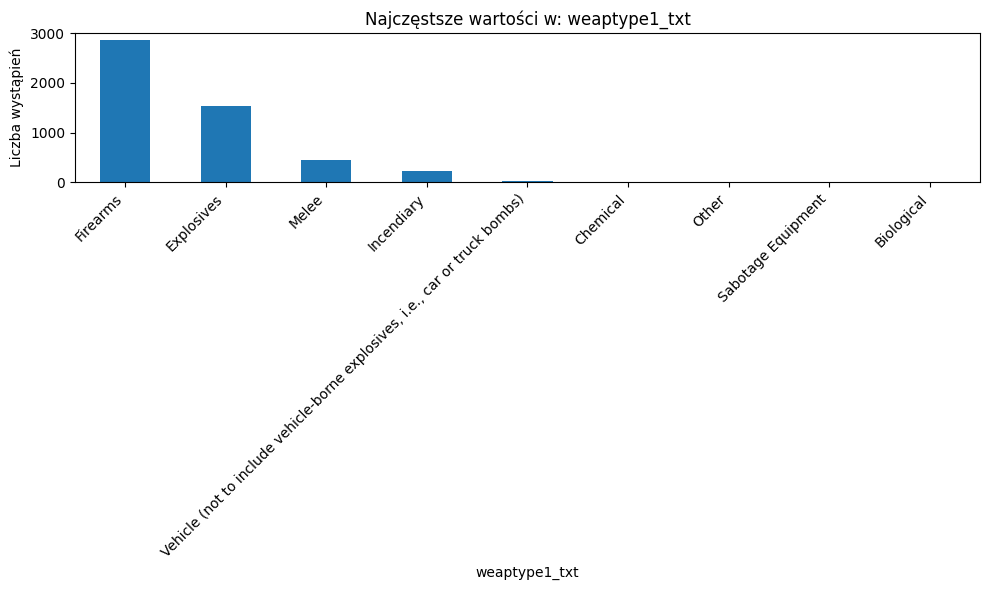

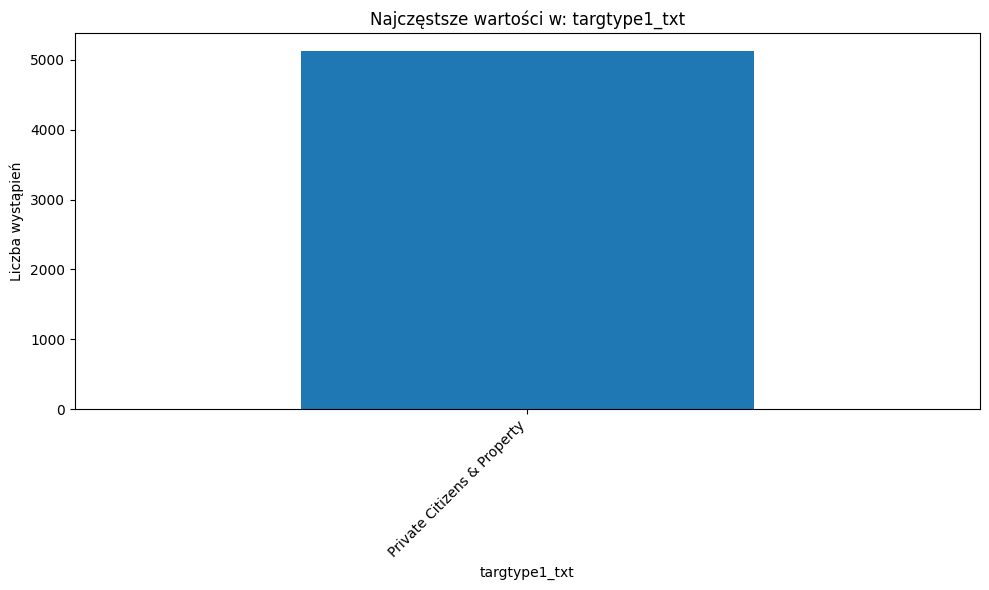

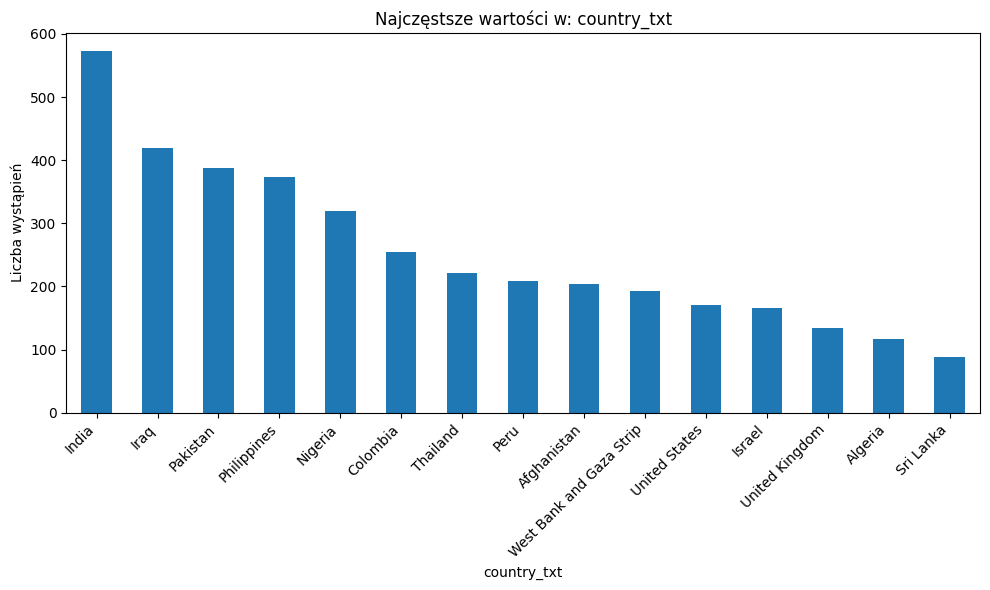

In [59]:
import matplotlib.pyplot as plt

# Histogramy dla danych liczbowych
for col in ['nkill', 'nperps']:
    plt.figure(figsize=(8, 4))
    df[col].dropna().hist(bins=50)
    plt.title(f'Rozkład wartości: {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba przypadków')
    plt.show()

# Wykresy słupkowe dla danych kategorycznych
for col in ['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'country_txt']:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().head(15).plot(kind='bar')  # Top 15 wartości
    plt.title(f'Najczęstsze wartości w: {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [60]:
df.count()

nkill              4977
attacktype1_txt    5130
weaptype1_txt      5130
targtype1_txt      5130
country_txt        5130
nperps             5130
dtype: int64